<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_3.2.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 3.2
# Benjamin Herrera
# 12 OCT 2024

# ⚠️ Run these commands prior to running anything

In [18]:
!pip install scipy
!pip install matplotlib
!pip install numpy

## 🛑🟩 Limits and Continuity

View limits as an approach towards a point. For example, as a man runs up to a stop sign that is 50 meters away from his starting point, his LIMIT (in terms of distance) running up to that stop sign is going to be 50 meters. This concept is crucial in calculus as it is used to determine what the value of a function is if the inputs are *approaching* towards a certain value. 

To clearly define this concept, let's first go over an **r-ball**. An r-ball is essentially a set of points in a euclidean space $A$ whose distance between itself and some reference point $x$ is under the distance of $r$. To define this distance with respect to any dimension of euclidean space, we can use the euclidean norm (quoting from the chapter):

$$||x|| = \sqrt{\sum^d_{i=1}x_i^2}$$

for all $x = (x_1, x_2, x_3, \dots, x_{d-1}, x_{d})^T \isin \reals^d$, where $d$ is the dimension of the euclidean space. 

To define the set of points within the radius, we define it as (quoting from the chapter):

$$B_r(x) = {y \isin \reals^d : ||y-x|| < r}$$

So what could this be used in? For starters, we can use this understanding for classification of different binary classes. For instance, if we can vectorize a model's output compared to reference point of what is a cat and what is not, we can simply use this r-ball understanding to find the set of model outputs that are within a certain error. In this case, the "certain" error is defined by $r$. Let's take a good look at this in a Python example.

In [19]:
# Let's define the list of potential model outputs
# For this example, the model was given three images and the following 
#   vectors are final representations z that would be based to a binary 
#   classifiers (cat vs not cat)
outputs = [
    [5.2, 5.3, 6.7],
    [9.2, 7.5, 1.2],
    [4.3, 3.2, 7.8]
]

# Define the reference point of the cat
reference = [6.7, 2.3, 7.3]

# Define a function that calculates the euclidean norm
def euclidean_norm(x):
    value = 0
    for i in x:
        value += i**2
    return value**(1/2)

# Define the "certain error" (error threshold, r, error tolerance)
r = 4

# Get the differences of the outputs to the reference point, get the
#   euclidean norm of it, and see if it is below the threshold
for pos, i in enumerate(outputs):
    difference = [j - reference[idx] for idx, j in enumerate(i)]
    print(f"Output {pos+1}", i, euclidean_norm(difference) < r)

Output 1 [5.2, 5.3, 6.7] True
Output 2 [9.2, 7.5, 1.2] False
Output 3 [4.3, 3.2, 7.8] True


As you can see, output 1 and 2 are behind the defined $r$ value. Thus, those values are within the r-ball of the reference point. Output 2 on the other hand isn't and isn't part of the r-ball.

Now how does this tie back to limits? Well let's first define what a limit is. Given some function (as quoted from the chapter), $f : D \rightarrow \reals$ where $D \isin \reals^d$. Then $f$ should have an approach (limit) $L \isin \reals$. This is only true if the input $x$ approach some $a \isin \reals$. It can also be described as:

$$\lim_{x\rightarrow a} f(x) = L$$

The r-ball plays into all of this because we can use the $r$ value to see what values are good enough to the reference point. The values are analogous to $x$ approaching to the analogous reference point $a$. Going back to the man running to the stop sign example, we can define his distance function as $f(x) = 5x$ where $x$ is the amount of time he taking to run. This means that the man is running 5 m/s and will take him 10 seconds to get to the stop sign. As the man approaches 10 seconds, his limit will be 50 meters. 

Now there is one thing to note about the limit. The limit can only be used on continuous functions. That means that functions with abrupt angles or hollow points with a limit approaching to the $x$ of that angle or hollow point cannot have a defined limit at those points. 

## 🌿 Derivatives

We use derivatives all the time. In fact, the mention of:

>  we can define his distance function as $f(x) = 5x$ where $x$ is the amount of time he taking to run. This means that the man is running 5 m/s

is an example of a derivative. How? Remember how I said that $f$ in that example is a distance function where $f : \textrm{seconds} \rightarrow \textrm{distance}.$ If I were to get the function of that with respect to time (seconds), then I get a function $f'(x) = 5$. This means that no matter at what time the man is running, his speed is going to be 5 m/s. In other words, the function has the input and output dynamic of $f' : \textrm{seconds} \rightarrow \textrm{meters / seconds}$. This is how I was able to derive that the man's running speed is 5 m/s.

But how did I transform that function in $f'(x) = 5$? Well, we use this notation to do that transformation:

$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h)-f(x)}{h}$$

Another way you can see the derivative is (quoting from the chapter) the function's rate of change in accordance to another variable. In our running man example, the derivative function ultimately modeled the man's meter/seconds. Here you can see how the man's distance changed in respect to seconds. This leads to the notation of:

$$f'(x) = \frac{df}{dx}$$

Let's take a look with python on how these functions are graphed out!

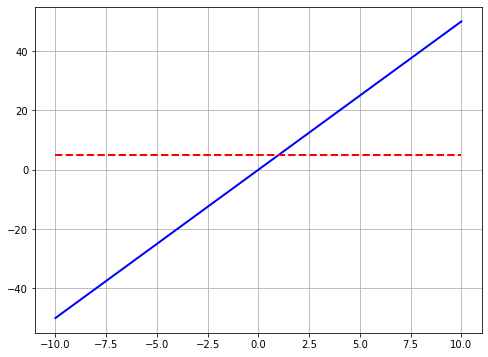

In [20]:
# Import the libraries necessary to plot the graphs
import numpy as np
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(-10, 10, 400)

# Compute what the resulting function outputs are
# REMEMBER:
#   f(x)  = 5x
#   f'(x) = 5
f = (lambda: 5 * x)()
f_prime = (lambda: 5 * np.ones_like(x))()

# Plot the graphs
plt.figure(figsize=(8, 6))
plt.plot(x, f, label = "f(x)", color = "blue", linestyle="-", linewidth=2)
plt.plot(x, f_prime, label="f'(x)", color = "red", linestyle="--", linewidth=2)
plt.grid(True)
plt.show()

As you can see, we have the standard $f$ function as a diagonal line going up and to the right. On the other hand, the derivative of that function is a straight line on the $y=5$ level. This upholds of what was said previously:

> we can define his distance function as $f(x) = 5x$ where $x$ is the amount of time he taking to run. This means that the man is running 5 m/s and will take him 10 seconds to get to the stop sign. As the man approaches 10 seconds, his limit will be 50 meters. 

> This means that no matter at what time the man is running, his speed is going to be 5 m/s.

One property of derivatives, is that the distribution is cumulative on addition terms. For example

$$\frac{d}{dx}[c f(x) + d g(x)] = c \frac{df}{dx} + d \frac{dg}{dx}$$

Another property is the definition of direction of a function using r-ball. If we know for a fact that the derivative function given some input $x$ is greater than 0, then we can use an r-ball that is within the possible inputs of the function where every item in that set:

- has the output of $f(x)$ greater in value than $f(x')$ if $x$ is greater than $x'$
- and vice versa

With these in mind, there is a theorem called *Mean Value*. Mean value is when there is a range $[a, b]$ for the inputs of $f$, there is a derivative that exists for that function under the range $(a, b)$ (This is exclusive because of the limit limitations [haha, get it? Ok, I'll stop] of prevents incomplete ends of a function) that can be defined as:

$$\frac{f(b) - f(a)}{b - a} = f'(c)$$

where $a < c < b$.

Going back to our wonderful running man example, if we have the ends of $a = 0$ and $b = 10$, then we get:

In [21]:
# Define the ends of the function
a = 0
b = 10

# Define the function in lambda example
f = lambda x : 5 * x

# Calculate the f(b) and f(a)
f_b = f(b)
f_a = f(a)

# Calculate the alternative differentiation form
f_prime_on_c = (f_b - f_a) / (b - a)

# Print out the results:
print("f'(c) =", f_prime_on_c)

f'(c) = 5.0


If $c$ is any value of the range $[0, 10]$. The derivative is always going to be $5.0$. In fact, we even extend the boundaries in both direction, we will always get $5$ for whatever c. We can even put it to infinity.

In [22]:
# Define the ends of the function with really large numbers to represent inf's
a = -69696969696969696969696969
b = 69696969696969696969696969

# Define the function in lambda example
f = lambda x : 5 * x

# Calculate the f(b) and f(a)
f_b = f(b)
f_a = f(a)

# Calculate the alternative differentiation form
f_prime_on_c = (f_b - f_a) / (b - a)

# Print out the results:
print("f'(c) =", f_prime_on_c)

f'(c) = 5.0


Now, what if we have a function with multiple different inputs, but I want to get the rate of change based off of one variable? Well, we can do that with partial derivatives. Using the previous definition of partial derivatives, we can define it as such:

$$\frac{\partial f(x)}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x + h e_i) - f(x)}{h}$$

The difference here is the $e_i$ variable which represents a corresponding error term for $h$ as it approaches to 0. The properties of the normal derivatives described as above largely remain the same here as well. 

Let's say for example that we have a function that can tell us the production of an apple tree given:

1. The number of completed days in the year ($x$)
2. The humidity of the area given the value $x$ ($y$)

We can define this function as $f(x, y) = 3x^2 + 2xy + y^2$

The partial derivative of $f$ with respect to $x$ is: 

$$\frac{\partial f}{\partial x} = 6x + 2y$$

With respect to $y$, it is:

$$\frac{\partial f}{\partial y} = 2x + 2y$$

Plotted in a graph, it'll look something like this:

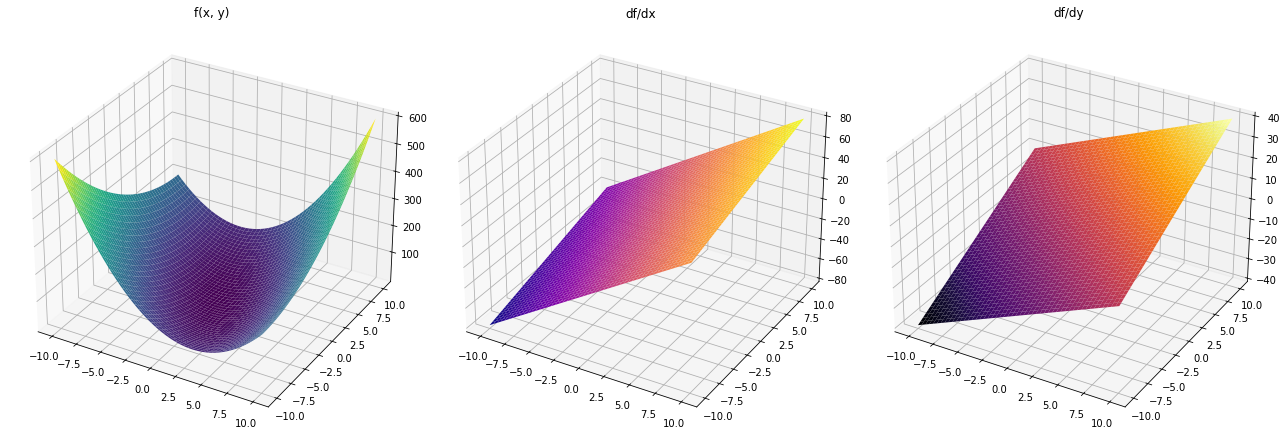

In [23]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the x and y range
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Compute the function f(x, y) and its partial derivatives
f = (3 * X**2) + (2 * X * Y) + (Y ** 2)
f_x = (6 * X) + (2 * Y)
f_y = (2 * X) + (2 * Y)

# Create the 3D plot for the function f(x, y)
fig = plt.figure(figsize=(18, 6))

# Plot f(x, y)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, f, cmap='viridis')
ax1.set_title("f(x, y)")

# Plot df/dx
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, f_x, cmap='plasma')
ax2.set_title("df/dx")

# Plot df/dy
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, f_y, cmap='inferno')
ax3.set_title("df/dy")

# Show the plots
plt.tight_layout()
plt.show()


In the above figure, we have three graphs. The first, from left to right shows the function that models the amount of apples produced based on the number of days passed in the year and the humidity of the tree's area based on that time. In the second graph, it shows the partial differentiation of that function with respect to the number of completed days. In the third graph, it shows the partial differentiation of the function with respect to the humidity.

Because of how you can get various different functions for the partial derivative of a function with respect to a certain input variable, we can represent these functions into a vector, making it easier to represent this information. For example, if we have some arbitrary function $f(x_1, x_2, \dots, x_n)$, we can represent it's differentiation in a vector:

$$\frac{\partial f(x)}{\partial x} = \{ \frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, \dots, \frac{\partial f(x)}{\partial x_n} \}$$

If we  have multiple functions we want to represent in vector form, we can create a matrix of it. This is called the *Jacobian* $J_f(x)$. In some light, it can even be represented as $\nabla f(x)^T$, which is a transposed form of the $\frac{\partial f(x)}{\partial x}$. We also call this the gradient of a function. You might be wondering what the use of the Jacobian is. To answer that question, let's look at neural networks and how they learn. In a simplified manner, a neural network has a set of multiple different functions. And when we want to change the coefficients (parameters) of that network so that it produces less erroroneous predictions, we want to find a "direction" to change that. That is possible with a jacobian because we can find each function's best rate of change, with respect to all input types individually, and get a means to go lower in error. This is sort of the basic idea of optimization which we will visit later down the road. Another cool thing about the jacobian is that the gradient of $\nabla f$ is called the *Hessian*. You can think of it as a second derivative for the jacobian of the function.

## 😜 Taylor's Theorem

Taylor's Theorem utilizes a polynomial to get a decent estimation of a function on $x$. Using the content discussed from above, we can determine the definition of a function $f(a)$ on the domain $[a, b]$. This can be done through:

$$f(a) = f(x) + (a-b)f'(x) + \frac{1}{2}(a-b)f''(x) + \dots \frac{(a - x)^{n - 1}}{(n - 1)!}f^{n-1}(x) + C$$

We change the precision of this definition through orders. For example, if the above function was described for another function with the first three terms, plus the regularizer $C$, then the degree of the function is 3. If we have 420 terms, then we will have a degree of 420. This is crucial as the more degrees we have, the better the representation of the function.

If we have the gradient of the function, we can easily represent it back to it's original form via the Multivariate Mean Value theorem. This is represented as:

$$f(x) = f(x') + \nabla f(x' + \alpha (x - x'))^T (x - x')$$

Where $x'$ is the first/arbitrary input of the entire set of inputs $X$ and $\alpha$ is either 1 or 0.